In [1]:


import re 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from textblob import TextBlob
import matplotlib.pyplot as plt 
from collections import Counter
from pandarallel import pandarallel


import nltk
import string
from nltk.stem import WordNetLemmatizer


import torch 
import torch.nn as nn 
from torch.utils.data import Dataset,DataLoader


from sklearn.svm import LinearSVC
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [2]:

pandarallel.initialize(nb_workers=4,progress_bar=True)
pandarallel.initialize(nb_workers=4,progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


<br>
<br>

# `#1. Data Preprocessing:` 

<br>
<br>

- 1. lowercase
- 2. remove html tag
- 3. remove emoji
- 4. remove url 
- 5. remove punctuation
- 6. Spell Checking
- 7. Chat Word Teatment
- 8. stemming or lemmatization


<br>



In [3]:

df = pd.read_csv(filepath_or_buffer="spam.csv",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)


In [5]:
df.tail(5)

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


<br>

### 1. Lowercasing:

<br>

In [6]:

def smaller(sentence):
    return sentence.lower()

smaller("MY Name IS YASIN")

'my name is yasin'

In [7]:
df["v2"] = df["v2"].apply(smaller)
df["v1"] = df["v1"].apply(smaller)
df.tail(5)

,v1,v2
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...
5571,ham,rofl. its true to its name


<br>

### 2. html url:

<br>

In [8]:

def remove_html(sentence):
    return re.sub(pattern="<.*?>",repl="",string=sentence)


test_sen = "<h1> this is header file. <h2>"
remove_html(test_sen)

' this is header file. '

In [9]:

df["v2"] = df["v2"].apply(remove_html)
df.sample(5)

,v1,v2
3851,ham,"no, its true..k,do u knw dis no. &lt;#&gt; ?"
4916,spam,this is the 2nd time we have tried 2 contact u...
5470,ham,i thought slide is enough.
5327,ham,wishing you a wonderful week.
1384,ham,"storming msg: wen u lift d phne, u say \hello\..."


<br>

### 3. remove emoji:

<br>

In [10]:
text = ''' Hello! 👋 How are you doing today? I'm planning to go for a walk in the park 🌳. 
It's such a beautiful day! ☀️ Let's catch up later over coffee ☕. Have a great day! 😊 '''

def removeEmoji(text):
    emoji_pattern = re.compile(
    "[" 
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U00002700-\U000027BF"  # Dingbats
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U00002600-\U000026FF"  # Miscellaneous Symbols
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "]+", flags=re.UNICODE)
    ans = emoji_pattern.sub("",text)
    return ans 

print(removeEmoji(text))


 Hello!  How are you doing today? I'm planning to go for a walk in the park . 
It's such a beautiful day! ️ Let's catch up later over coffee . Have a great day!  


In [11]:

df["v2"] = df["v2"].apply(removeEmoji)
df.sample(4)

,v1,v2
104,ham,umma my life and vava umma love you lot dear
5085,ham,sorry i missed your call. can you please call ...
4785,ham,holy living christ what is taking you so long
5081,ham,\hi babe uawake?feellikw shit.justfound out vi...


<br>

### 4. remove url:

<br>

In [12]:

def remove_url(text):
    compile = re.compile(r"https?:\S+")
    ans = compile.sub(repl="",string=text)
    return ans 

df['v2'] = df['v2'].apply(remove_url)

In [13]:
df.sample(4)

,v1,v2
4600,spam,freemsg: txt: call to no: 86888 & claim your r...
5522,ham,thats cool. i want to please you...
1018,ham,nope watching tv at home... not going out. v b...
1334,ham,oh ! a half hour is much longer in syria than ...


<br>

### 5. remove punctuation:

<br>

In [14]:



def remv_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))


df['v2'] = df['v2'].parallel_apply(remv_punctuation)
df.head(5)

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


<br>

### 6. Spell Checking:

<br>

In [15]:

test = "he ws vry bad"
txtblb = TextBlob(test)
txtblb.correct().string

'he was very bad'

In [16]:

def spell_checking(text):
    txtblb = TextBlob(text)
    return txtblb.correct().string

df["v2"] = df['v2'].astype(str).parallel_apply(spell_checking)
df.sample(2)

,v1,v2
3257,ham,he fucking thickened out he message me he woul...
5366,spam,a å£400 was reward is waiting for you our comp...



<br>

###  7. Chatword Treatment:

<br>


In [17]:

abbreviations = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}


# we alrady convert all the word small, so don't worry 
# if word in upper letter:
def chatword(txt):
    new_txt = []
    for word in txt.split(" "):
        key = word.upper()
        if key in abbreviations:
            new_txt.append(abbreviations[key].lower())
        else:
            new_txt.append(word)
    return " ".join(new_txt)

chatword("Hi csl how are you")

'Hi can’t stop laughing how are you'

In [18]:
df['v2'] = df['v2'].apply(chatword)
df.sample(3)

,v1,v2
2230,ham,hey the we jug go according to wat we discusse...
3473,ham,how things just a quick question
4385,ham,in on the snowboarding trip i was wondering ...




<br>

###  8. Stemming or Lemitization:

<br>


In [19]:


vocavoluray = nltk.download('wordnet')
word_net_lemmetization = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /home/yasin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:

def lemmetization(text):
    fnl_str = []
    for word in text.split(" "):
        base_wrd = word_net_lemmetization.lemmatize(word)
        fnl_str.append(word)
    return " ".join(fnl_str)

df['v2'] = df['v2'].parallel_apply(lemmetization)

In [21]:

df.head(10)

,v1,v2
0,ham,go until during point crazy available only in ...
1,ham,ok war joking if you on
2,spam,free entry in 2 a wily come to win a cup final...
3,ham,you dun say so early for you c already then say
4,ham,ah i dont think he goes to us he lives around ...
5,spam,freemen hey there darling its been 3 weeks now...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request selle selle or minnaminung...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more you r entitl...


In [45]:


X_train,X_test,y_train,y_test = train_test_split(df["v2"],df["v1"],test_size=0.3,random_state=42)

X_train.size,X_test.size,y_train.size,y_test.size


(3900, 1672, 3900, 1672)

<br>


# `09: develop a model with Machine Larning:`

<br>

In [23]:
X_train.sample(5)

4646    god created gap been or fingers so dat sum ver...
4207    or i go home first war ì wait 4 me for i put d...
2938           are you ok what happen to behave like this
3061                              fine do you remember me
462     upgrdcentre orange customer you may now claim ...
Name: v2, dtype: object

In [24]:

countVec = CountVectorizer(ngram_range=(1,2),stop_words="english",max_features=10000)
X_train = countVec.fit_transform(X_train)
X_test = countVec.transform(X_test)


In [25]:

labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test =labelEncoder.transform(y_test)


In [26]:

labelEncoder.classes_


array(['ham', 'spam'], dtype=object)

In [27]:
y_test[:5]

array([0, 0, 1, 0, 1])

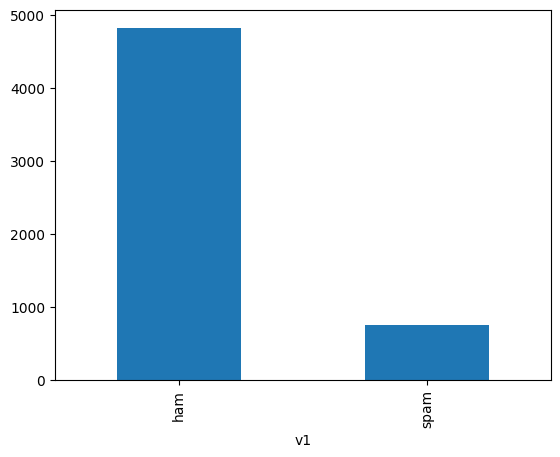

In [28]:

# count the number of value:
df["v1"].value_counts().plot(kind="bar")
plt.show()

# we need to give the same weight to every class cause our dataset is unbalanced:


In [29]:

svc = LinearSVC(random_state=42,class_weight='balanced',max_iter=50)
svc.fit(X_train,y_train)

/home/yasin/all_program/NLP/venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [30]:


y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)


0.9778708133971292

In [31]:

print(classification_report(y_true=y_test,y_pred=y_pred))

#"""
#
# precision 0: Out of all the messages the model predicted as ham, 98% were actually ham. 
# precision 1: Out of all the messages the model predicted as spam, 98% were actually spam.      
# 
# recall 0: Out of all real ham messages, the model correctly identified 100% of them as ham
# recall 1: Out of all real spam messages, the model correctly identified 85% of them as spam.
#
#"""

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [32]:


y_pred = svc.predict(X_train)
accuracy_score(y_train,y_pred)


1.0

In [33]:

print(classification_report(y_true=y_train,y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3372
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900



In [34]:

# sparse matrix:
X_train.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 10000))

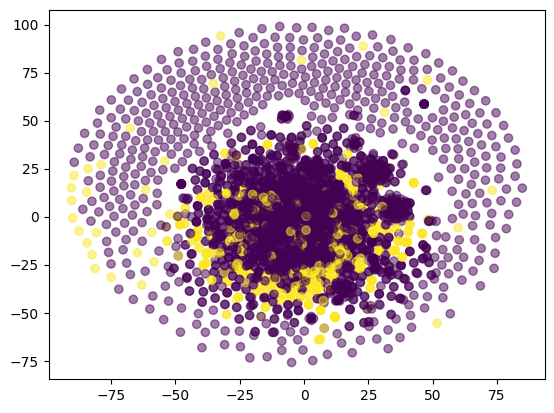

In [35]:

#T-distributed Stochastic Neighbor Embedding:
X_2d = TSNE(n_components=2, random_state=42).fit_transform(X_train.toarray())
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train,alpha=0.5)
plt.show()



<br>


# `10: Develop a sklearn pipeline:`

<br>

<br>


# `11: develop a deep learning model:`

<br>

In [36]:

# build the corpus:

corpus = []
for sen in df["v2"]:
    for word in sen.split(" "):
        corpus.append(word)

corpus[:5]


['go', 'until', 'during', 'point', 'crazy']

In [37]:
len(corpus)

87743

In [38]:

counter = Counter(corpus)

# sort values:
sort_token  = sorted(counter,key=counter.get,reverse=True) 
print(sort_token[:100])
print(len(sort_token))


['you', 'to', 'i', '', 'in', 'a', 'the', 'and', 'my', 'is', 'for', 'or', 'me', 'your', 'it', 'of', 'that', 'have', 'call', 'on', 'can', 'not', 'are', 'now', '2', 'so', 'at', 'but', 'up', 'if', 'do', 'just', 'get', 'will', 'with', 'be', 'we', 'this', 'no', 'how', 'left', 'its', 'was', 'go', 'what', 'when', 'from', 'all', '4', 'dont', 'free', 'know', 'ok', 'out', 'he', 'like', 'got', 'am', 'come', 'day', 'there', 'good', 'ill', 'then', 'eyes', 'want', 'only', 'tears', 'by', 'one', 'love', 'she', 'going', 'send', 'text', 'as', 'txt', 'give', 'see', 'today', 'had', 'about', 'need', 'back', 'home', 'tell', 'sorry', 'still', 'reply', 'mobile', 'r', 'stop', 'our', 'later', 'n', 'him', 'any', 'phone', 'think', 'her']
7264


In [39]:

vocab =["<UNK>", "<PAD>"] + sort_token[:7000]
len(vocab)

7002

In [40]:


vocab_to_indx = {word:idx  for idx,word in  enumerate(vocab)}
inx_to_vocab = {idx:word for idx,word in enumerate(vocab)}


In [46]:
X_train.sample(5)

5424    you horrible get a life you knew dat i was goi...
162     in so in love with you in excited each day i s...
3341                       you will go to palmar ill stay
4342    its a valentine game   send dis mug to all or ...
5276    funny let can remember may for so wat tears in...
Name: v2, dtype: object

In [47]:

# convert the data into integer token:
def encode_text(sen,vocab_to_indx,max_len=100):
    token = []
    for word in sen.split(" "):
        token.append(vocab_to_indx.get(word,vocab_to_indx["<UNK>"]))
    
    token = token[:max_len]
    token += [vocab_to_indx["<PAD>"]]*(max_len-len(token))
    return token 

X_train = X_train.apply(lambda x: encode_text(x,vocab_to_indx))
X_test = X_test.apply(lambda x: encode_text(x,vocab_to_indx))


In [48]:
X_train.sample(5)

3838    [1641, 779, 64, 137, 2, 30, 28, 83, 6190, 18, ...
588     [7, 1242, 298, 189, 4, 8, 1, 1, 1, 1, 1, 1, 1,...
193     [16, 35, 93, 21, 1017, 4, 1112, 2092, 73, 2683...
1093    [102, 8, 1148, 6, 485, 130, 29, 43, 4447, 24, ...
5531    [0, 3, 2, 44, 493, 48, 8, 1201, 41, 15, 764, 1...
Name: v2, dtype: object

In [ ]:


# dataset pipeline with pytorch:
class CustomDataset(Dataset):
    pass 

